In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import os
import json
import collections

In [2]:
dirs = os.listdir(".")

In [3]:
train_data_pct = os.getcwd().split("plot_data_")[-1].split("_")[:-1]

In [4]:
train_data_pct = "_".join(train_data_pct)

In [7]:
file_name_train_sharpness = []
file_name_train_hessian = []
file_name_train_loss = []
file_name_train_weightnorm = []
file_name_representativeness_double = []
file_name_representativeness_single = []
file_name_train_sharpness2 = []
file_name_val_loss = []
for item in dirs:
    if "plot" in item:
        continue
    if "loss_train" in item:
        file_name_train_loss.append(item)
    elif "loss_val" in item:
        file_name_val_loss.append(item)
    elif "sharpness_train" in item:
        file_name_train_sharpness.append(item)
    elif "sharpness2_train" in item:
        file_name_train_sharpness2.append(item)
    elif "hessian_train" in item:
        file_name_train_hessian.append(item)
    elif "weightnorm_train" in item:
        file_name_train_weightnorm.append(item)
    elif "representativeness_double_{}".format(repr_weight) in item and "a_" not in item:
        file_name_representativeness_double.append(item)
    else:
        continue

In [8]:
len(file_name_train_sharpness), len(file_name_train_hessian), len(file_name_train_loss), len(file_name_train_weightnorm), len(file_name_train_sharpness2), len(file_name_val_loss), len(file_name_representativeness_single), len(file_name_representativeness_double)

(620, 620, 620, 620, 620, 620, 0, 620)

In [9]:
cluster_step_list = []
for item in dirs:
    if "hessian_" in item:
        cluster_step_list.append(int(item.split("_")[-1].replace(".npy", "")))

cluster_step_list = sorted(cluster_step_list)

avg_train_cdnvs = []

for op_step in cluster_step_list:

    y_predict = np.load("y_train_labels_two_{}.npy".format(op_step))
    train_repr = np.load("train_repr_{}.npy".format(op_step))
    train_repr = train_repr.transpose(0,2,1)

    predict_token_list = []
    for item in y_predict:
        predict_token_list += item.tolist()

    predict_token_list = list(set(predict_token_list))

    # create a dict for each token
    token_dict = {key: [] for key in predict_token_list}
    for sub_y_predict, sub_train_repr in zip(y_predict, train_repr):
        key1, key2 = sub_y_predict.tolist()
        repr1, repr2 = sub_train_repr
        token_dict[key1].append(repr1)
        token_dict[key2].append(repr2)

    for key, value in token_dict.items():
        token_dict[key] = np.array(value)

    mean_var_batch_dict = {}
    for key, value in token_dict.items():
        temp_mean = np.mean(value, axis=0)
        temp_var = np.mean([np.linalg.norm(f - temp_mean) ** 2 for f in value])
        mean_var_batch_dict[key] = [temp_mean, temp_var]
    predict_token_list = predict_token_list[1:]

    all_train_cdnvs = []
    for c1 in predict_token_list:
        train_cdnvs = []
        for c2 in predict_token_list:
            if c2 == c1:
                continue
            mu1, var1 = mean_var_batch_dict[c1]
            mu2, var2 = mean_var_batch_dict[c2]
            temp_result = (var1 + var2) / (2 * np.linalg.norm(mu1 - mu2) ** 2)
            train_cdnvs.append(temp_result)
            all_train_cdnvs.append(temp_result)

    avg_train_cdnvs.append(np.mean(all_train_cdnvs))




In [10]:
train_sharpness_dict = {}
for item in file_name_train_sharpness:
    temp_int = item.split("_")[-1].split(".")[0]
    train_sharpness_dict[int(temp_int)] = item

train_sharpness_dict = collections.OrderedDict(sorted(train_sharpness_dict.items()))
train_sharpness_array = []
train_sharpness_step_list = []
for key, value in train_sharpness_dict.items():
    temp_data = np.load(value)
    train_sharpness_step_list.append(key)
    train_sharpness_array.append(np.average(temp_data))
train_sharpness_array = np.array(train_sharpness_array)


In [11]:
# sharpness2
train_sharpness2_dict = {}
for item in file_name_train_sharpness2:
    temp_int = item.split("_")[-1].split(".")[0]
    train_sharpness2_dict[int(temp_int)] = item

train_sharpness2_dict = collections.OrderedDict(sorted(train_sharpness2_dict.items()))

train_sharpness2_array = []
train_sharpness2_step_list = []
for key, value in train_sharpness2_dict.items():
    temp_data = np.load(value)
    train_sharpness2_array.append(np.average(temp_data))
    train_sharpness2_step_list.append(key)
train_sharpness2_array = np.array(train_sharpness2_array)

In [14]:
train_weightnorm_dict = {}
for item in file_name_train_weightnorm:
    temp_int = item.split("_")[-1].split(".")[0]
    train_weightnorm_dict[int(temp_int)] = item

train_weightnorm_dict= collections.OrderedDict(sorted(train_weightnorm_dict.items()))
train_weightnorm_array = []
train_weightnorm_step_list = []
for key, value in train_weightnorm_dict.items():
    temp_data = np.load(value)
    train_weightnorm_step_list.append(key)
    train_weightnorm_array.append(np.average(temp_data))
train_weightnorm_array = np.array(train_weightnorm_array)


In [15]:
train_hessian_dict = {}
for item in file_name_train_hessian:
    temp_int = item.split("_")[-1].split(".")[0]
    train_hessian_dict[int(temp_int)] = item

train_hessian_dict= collections.OrderedDict(sorted(train_hessian_dict.items()))
train_hessian_array = []
train_hessian_step_list = []
for key, value in train_hessian_dict.items():
    temp_data = np.load(value)
    train_hessian_step_list.append(key)
    train_hessian_array.append(np.average(temp_data))
train_hessian_array = np.array(train_hessian_array)


In [16]:
train_loss_dict = {}
for item in file_name_train_loss:
    temp_int = item.split("_")[-1].split(".")[0]
    train_loss_dict[int(temp_int)] = item

train_loss_dict = collections.OrderedDict(sorted(train_loss_dict.items()))
train_loss_array = []
train_single_loss_array = []
train_loss_step_list = []
for key, value in train_loss_dict.items():
    temp_data = np.load(value)
    train_single_loss_array.append(np.average(temp_data[:, 0]))
    train_loss_array.append(np.average(temp_data))
    train_loss_step_list.append(key)
train_loss_array = np.array(train_loss_array)
train_single_loss_array = np.array(train_single_loss_array)


In [17]:
# validation loss
val_loss_dict = {}
for item in file_name_val_loss:
    temp_int = item.split("_")[-1].split(".")[0]
    val_loss_dict[int(temp_int)] = item

val_loss_dict = collections.OrderedDict(sorted(val_loss_dict.items()))

val_loss_array = []
val_single_loss_array = []
val_loss_step_list = []
for key, value in val_loss_dict.items():
    temp_data = np.load(value)
    val_single_loss_array.append(np.average(temp_data[:, 0]))
    val_loss_array.append(np.average(temp_data))
    val_loss_step_list.append(key)
val_loss_array = np.array(val_loss_array)
val_single_loss_array = np.array(val_single_loss_array)

In [18]:
train_hessian_step_list == train_weightnorm_step_list == train_loss_step_list == train_sharpness_step_list

True

In [19]:
# please load the acc and loss values from default directory after the run of grokking experiments
train_acc_x = np.load("train_acc_x.npy")
train_acc_y = np.load("train_acc_y.npy")
val_acc_x = np.load("val_acc_x.npy")
val_acc_y = np.load("val_acc_y.npy")

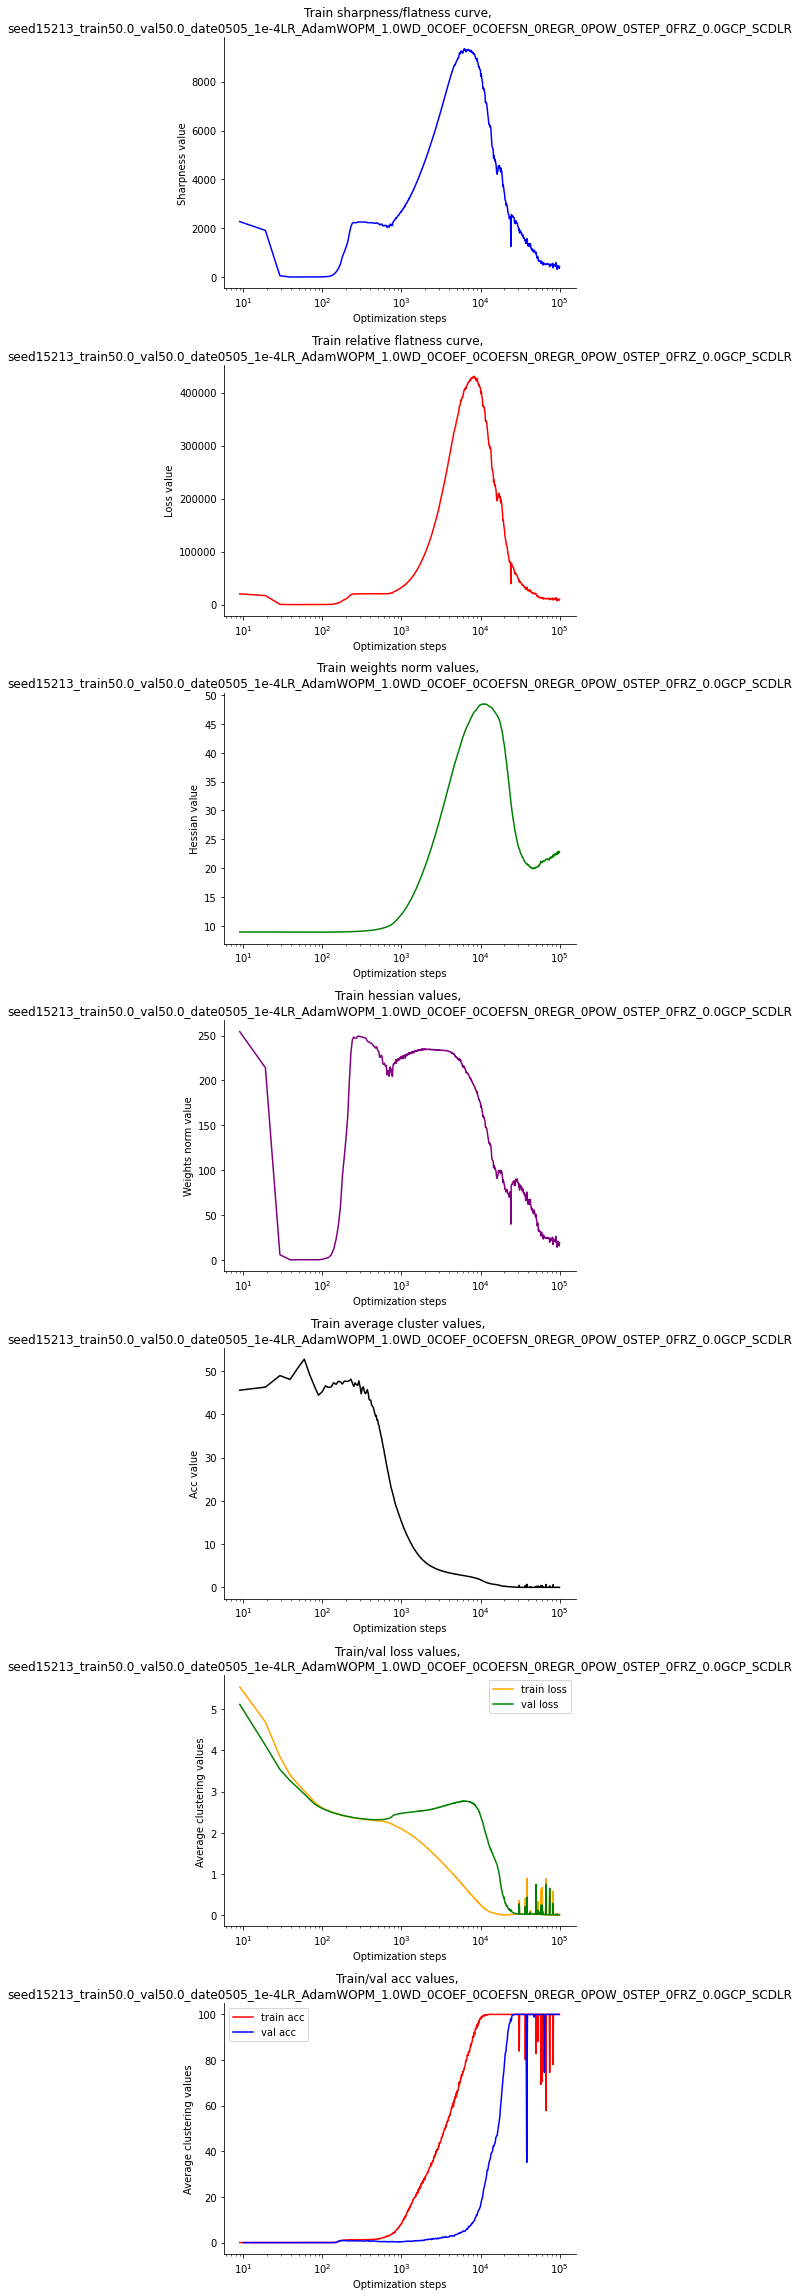

In [22]:
fig, ax = plt.subplots(7,1, figsize=(6,32))


ax[0].plot(train_sharpness_step_list, train_sharpness_array, color='blue', label="sharpness")
ax[1].plot(train_sharpness2_step_list, train_sharpness2_array, color='red', label="sharpness2")
ax[2].plot(train_weightnorm_step_list, train_weightnorm_array, color='green', label="weightnorm")
ax[3].plot(train_hessian_step_list, train_hessian_array, color='purple', label="hessian")
ax[4].plot(cluster_step_list, avg_train_cdnvs, color='black', label="acc")
ax[5].plot(train_loss_step_list, train_loss_array, color='orange', label="train loss")
ax[5].plot(val_loss_step_list, val_loss_array, color='green', label="val loss")
ax[5].legend()
ax[6].plot(train_acc_x, train_acc_y, color='red', label="train acc")
ax[6].plot(val_acc_x, val_acc_y, color='blue', label="val acc")
ax[6].legend()

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[4].set_xscale('log')
ax[5].set_xscale('log')
ax[6].set_xscale('log')
# ax[7].set_xscale('log')
# ax[8].set_xscale('log')
# ax[9].set_xscale('log')
# ax[10].set_xscale('log')

ax[0].set_title("Train sharpness/flatness curve, \n{}".format(train_data_pct))
ax[1].set_title("Train relative flatness curve, \n{}".format(train_data_pct))
ax[2].set_title("Train weights norm values, \n{}".format(train_data_pct))
ax[3].set_title("Train hessian values, \n{}".format(train_data_pct))
ax[4].set_title("Train average cluster values, \n{}".format(train_data_pct))
ax[5].set_title("Train/val loss values, \n{}".format(train_data_pct))
ax[6].set_title("Train/val acc values, \n{}".format(train_data_pct))


ax[0].set_xlabel("Optimization steps")
ax[1].set_xlabel("Optimization steps")
ax[2].set_xlabel("Optimization steps")
ax[3].set_xlabel("Optimization steps")
ax[4].set_xlabel("Optimization steps")
ax[5].set_xlabel("Optimization steps")
ax[6].set_xlabel("Optimization steps")


ax[0].set_ylabel("Sharpness value")
ax[1].set_ylabel("Loss value")
ax[2].set_ylabel("Hessian value")
ax[3].set_ylabel("Weights norm value")
ax[4].set_ylabel("Clustering")
ax[5].set_ylabel("Train/val loss")
ax[6].set_ylabel("Train/val acc")


ax[0].spines[['right', 'top']].set_visible(False)
ax[1].spines[['right', 'top']].set_visible(False)
ax[2].spines[['right', 'top']].set_visible(False)
ax[3].spines[['right', 'top']].set_visible(False)
ax[4].spines[['right', 'top']].set_visible(False)
ax[5].spines[['right', 'top']].set_visible(False)
ax[6].spines[['right', 'top']].set_visible(False)

fig.tight_layout()